# Geometric Transformation of Images

> Disclaimer: Images shown in this notebook is from various artist(s) on the internet. I do not own any of the images.
> Please support the artist(s): 
> [@ptitsatart](https://twitter.com/ptitsatart)

In [1]:
from typing import Union

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

import logging

In [2]:
logging.basicConfig(
    #  filename='log_file_name.log',
     level=logging.INFO, 
     format= '[%(asctime)s] %(levelname)s - %(message)s',
     datefmt='%H:%M:%S'
 )

In [8]:
def show_image(img, title=None, scale=1):
    figsize = (img.shape[1] * scale/100, img.shape[0] * scale/100)
    logging.info(f"Showing image ... ({' x '.join([str(d) for d in figsize])})")
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.imshow(img)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    if title is not None:
        ax.set_title(title)
    plt.show()

[10:10:52] INFO - Showing image ... (12.0 x 8.22)


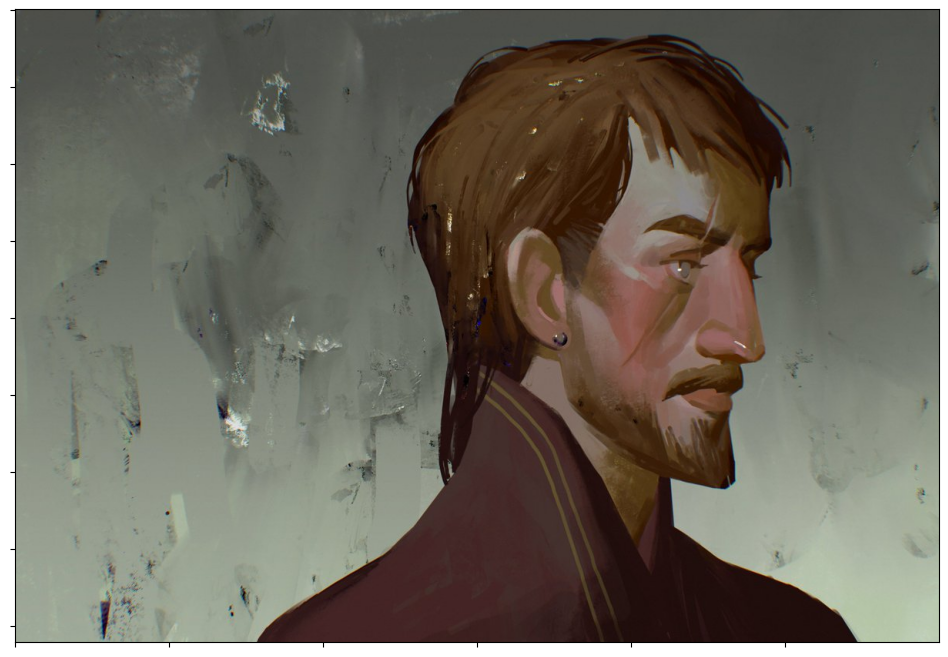

In [33]:
img = cv.imread("../data/ptitsatart1.jpg")
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

width, height = img.shape[1], img.shape[0]
show_image(img_rgb)

## Scaling

In [13]:
?cv.resize

Docstring:
resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst
.   @brief Resizes an image.
.   
.   The function resize resizes the image src down to or up to the specified size. Note that the
.   initial dst type or size are not taken into account. Instead, the size and type are derived from
.   the `src`,`dsize`,`fx`, and `fy`. If you want to resize src so that it fits the pre-created dst,
.   you may call the function as follows:
.   @code
.       // explicitly specify dsize=dst.size(); fx and fy will be computed from that.
.       resize(src, dst, dst.size(), 0, 0, interpolation);
.   @endcode
.   If you want to decimate the image by factor of 2 in each direction, you can call the function this
.   way:
.   @code
.       // specify fx and fy and let the function compute the destination image size.
.       resize(src, dst, Size(), 0.5, 0.5, interpolation);
.   @endcode
.   To shrink an image, it will generally look best with #INTER_AREA interpolation, whereas to
.   enlar

For shrinking, best interpolation method is cv2.INTER_AREA. For zooming, best interpolation method is cv2.INTER_CUBIC (slow) or cv2.INTER_LINEAR (faster but still looks OK).

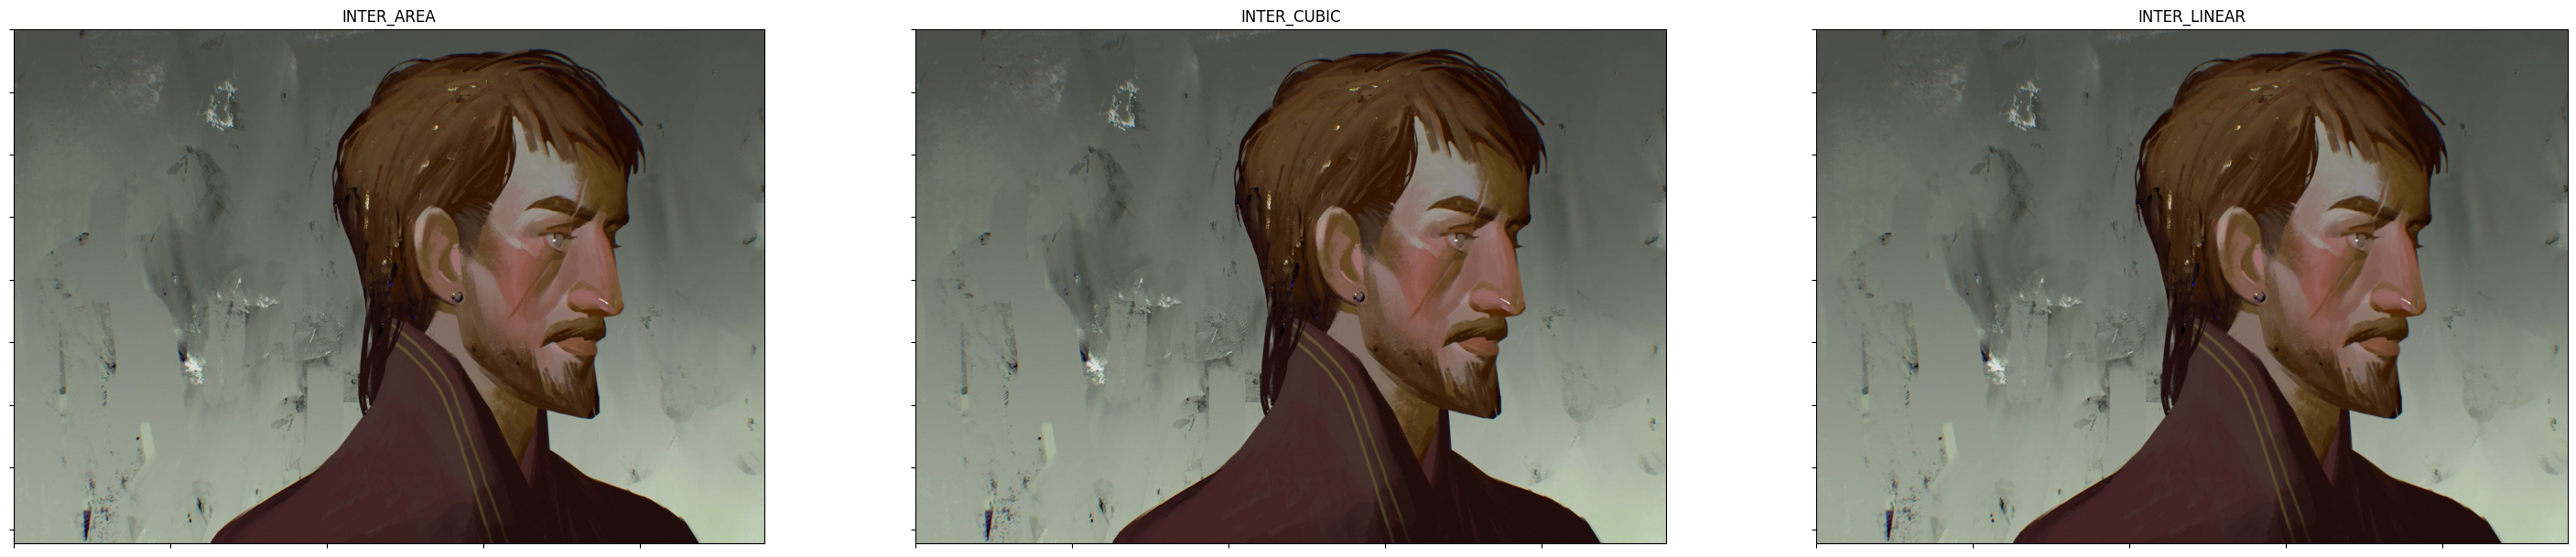

In [26]:
scale = 2

# shrinking
res1 = cv.resize(img_rgb, (0, 0), fx=scale, fy=scale, interpolation=cv.INTER_AREA)
res2 = cv.resize(img_rgb, (0, 0), fx=scale, fy=scale, interpolation=cv.INTER_CUBIC)
res3 = cv.resize(img_rgb, (0, 0), fx=scale, fy=scale, interpolation=cv.INTER_LINEAR)

# display side by side
figsize = (img_rgb.shape[1]/100, img_rgb.shape[0]/100)
_, ax = plt.subplots(1, 3, figsize=(figsize[0]*3, figsize[1]))
i = 0
for interp, res in {
    'INTER_AREA': res1,
    'INTER_CUBIC': res2, 
    'INTER_LINEAR': res3
    }.items():

    ax[i].imshow(res)
    ax[i].set_title(interp)
    ax[i].xaxis.set_ticklabels([])
    ax[i].yaxis.set_ticklabels([])
    i += 1

plt.show()


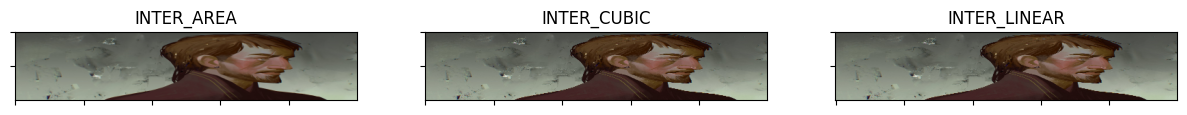

In [32]:
new_size=(500, 100)
# shrining
res1 = cv.resize(img_rgb, new_size, interpolation=cv.INTER_AREA)
res2 = cv.resize(img_rgb, new_size, interpolation=cv.INTER_CUBIC)
res3 = cv.resize(img_rgb, new_size, interpolation=cv.INTER_LINEAR)

# display side by side
figsize = (new_size[0]/100, new_size[1]/100)
_, ax = plt.subplots(1, 3, figsize=(figsize[0]*3, figsize[1]))
i = 0
for interp, res in {
    'INTER_AREA': res1,
    'INTER_CUBIC': res2, 
    'INTER_LINEAR': res3
    }.items():

    ax[i].imshow(res)
    ax[i].set_title(interp)
    ax[i].xaxis.set_ticklabels([])
    ax[i].yaxis.set_ticklabels([])
    i += 1

plt.show()


## Translation

Let $ M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix} $ be the transformation matrix.

$t_x$ is shifting on the x direction, and $t_y$ is shifting on the y direction.

[10:12:08] INFO - Showing image ... (12.0 x 8.22)


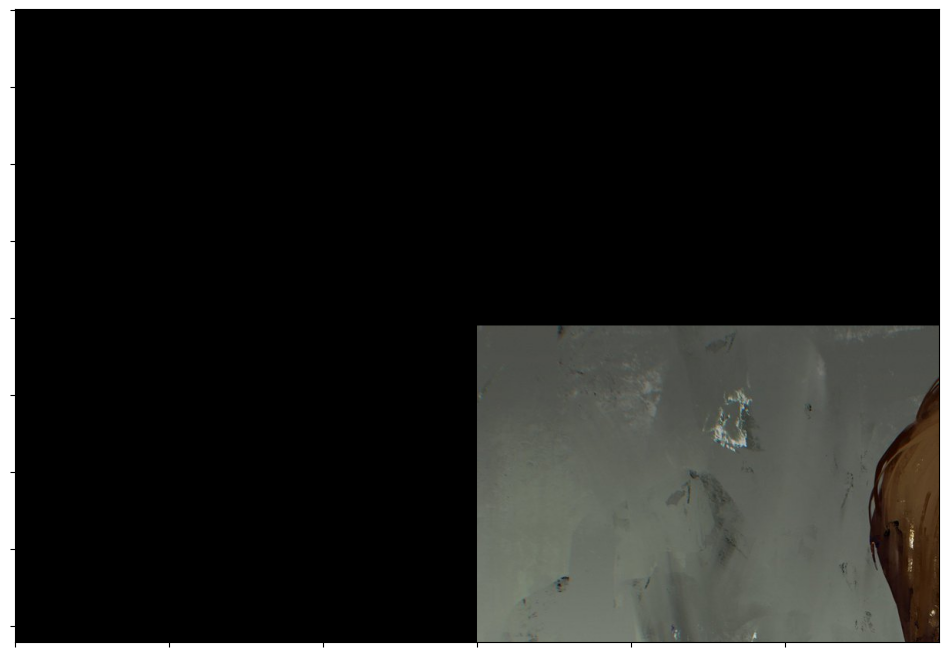

In [37]:
t_x, t_y = width/2, height/2
M = np.float32([[1, 0, t_x], [0, 1, t_y]])

dst  = cv.warpAffine(img_rgb, M, (width, height))

show_image(dst)

## Rotation

The basic transformation matrix is like this:

$ M = \begin{bmatrix} \cos \theta & -\sin \theta \\ \sin \theta & \cos \theta \end{bmatrix} $

OpenCV's transformation matrix is like this:

$ M = \begin{bmatrix} \alpha & \beta & (1-\alpha)\cdot center.x - \beta \cdot center.y \\ -\beta & \alpha & \beta \cdot center.x + (1-\alpha) \cdot center.y  \end{bmatrix} $

where $\alpha=scale \cdot cos \theta$ and $\beta = scale \cdot sin\theta$, so you can rotate at any location your prefer

In [38]:
?cv.getRotationMatrix2D

Docstring:
getRotationMatrix2D(center, angle, scale) -> retval
.   @brief Calculates an affine matrix of 2D rotation.
.   
.   The function calculates the following matrix:
.   
.   \f[\begin{bmatrix} \alpha &  \beta & (1- \alpha )  \cdot \texttt{center.x} -  \beta \cdot \texttt{center.y} \\ - \beta &  \alpha &  \beta \cdot \texttt{center.x} + (1- \alpha )  \cdot \texttt{center.y} \end{bmatrix}\f]
.   
.   where
.   
.   \f[\begin{array}{l} \alpha =  \texttt{scale} \cdot \cos \texttt{angle} , \\ \beta =  \texttt{scale} \cdot \sin \texttt{angle} \end{array}\f]
.   
.   The transformation maps the rotation center to itself. If this is not the target, adjust the shift.
.   
.   @param center Center of the rotation in the source image.
.   @param angle Rotation angle in degrees. Positive values mean counter-clockwise rotation (the
.   coordinate origin is assumed to be the top-left corner).
.   @param scale Isotropic scale factor.
.   
.   @sa  getAffineTransform, warpAffine, transform
Typ

[10:21:01] INFO - Showing image ... (12.0 x 8.22)


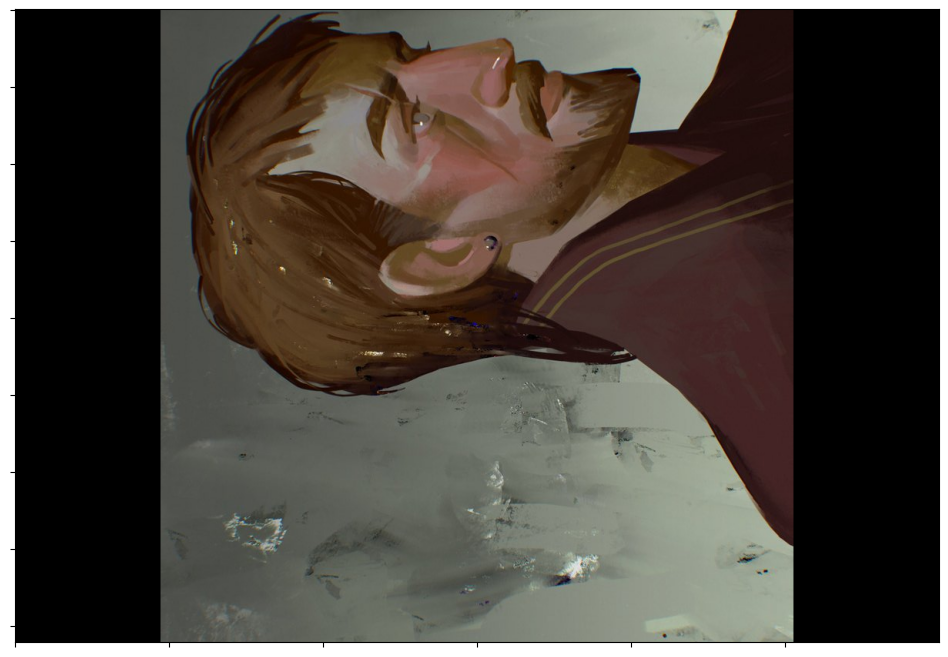

In [39]:
# rotate 90 degrees with respect to center without any scaling
M = cv.getRotationMatrix2D((width/2, height/2), 90, 1)
dst = cv.warpAffine(img_rgb, M, (width, height))
show_image(dst)